# SOK-1006 V24

## Forelesning 7 - Velferdseffekter av økonomisk politikk under fullkommen konkurranse (Kap 9)

#### 1. Forutsetninger for fullkommen konkurranse

- Det omsettes private goder i markedet uten eksterne virkninger.
- Det er et stort antall tilbydere og etterspørere, og ingen kan påvirke prisen.
- Produsenter fremstiller identiske produkter. Konsumenten er likegyldig hvem de kjøper hos.
- Aktørene i markedet er økonomisk rasjonelle (maksimering av fortjeneste og nytte).
- Full informasjon.
- Prisen er bestemt i samspill mellom tilbud og etterspørsel.
- Markedsdeltakere kan fritt gå inn eller ut av markedet.


#### 2. Likevekt under fullkommen konkurranse

Vi setter opp tilbud og etterspørsel, finner likevekten, og tegner likevekten i en figur. Dette er likevekt under fullkommen konkurranse, og dette har vi sett på før.


In [16]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [17]:
def demand(x):
    return (1500/(20+x))
def supply(x):
    return x**2/200

In [18]:
x=sp.symbols('x', real=True, positive=True)
equ=sp.Eq(demand(x),supply(x))
equ

Eq(1500/(x + 20), x**2/200)

In [19]:
x_eq=sp.solve(equ,x)
x_eq

[-20/3 + 10*(-1/2 - sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3) + 40/(9*(-1/2 - sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3)),
 -20/3 + 40/(9*(-1/2 + sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3)) + 10*(-1/2 + sqrt(3)*I/2)*(10*sqrt(2017)/3 + 4042/27)**(1/3),
 -20/3 + 40/(9*(10*sqrt(2017)/3 + 4042/27)**(1/3)) + 10*(10*sqrt(2017)/3 + 4042/27)**(1/3)]

In [20]:
# siste element er eneste som ikke er et imaginært tall
x_eq=float(x_eq[2])
x_eq

60.89684931003215

In [21]:
p_eq=demand(x_eq)
p_eq

18.542131279443815

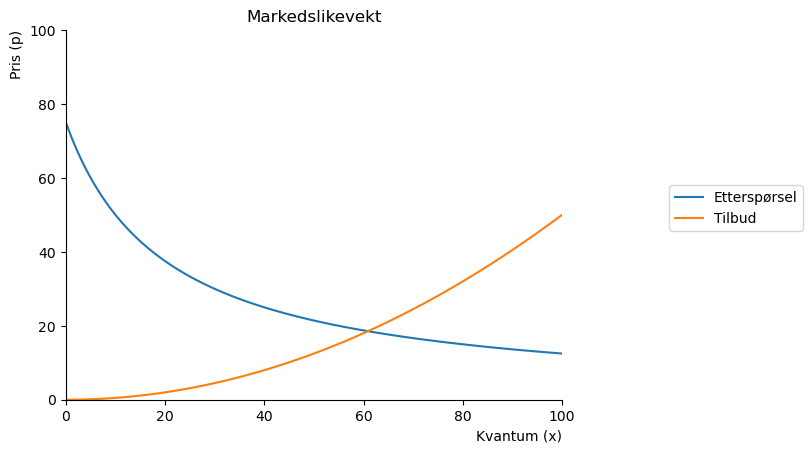

In [22]:
x_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num), label='Tilbud')



# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

La oss tegne inn likevektspris og -kvantum.

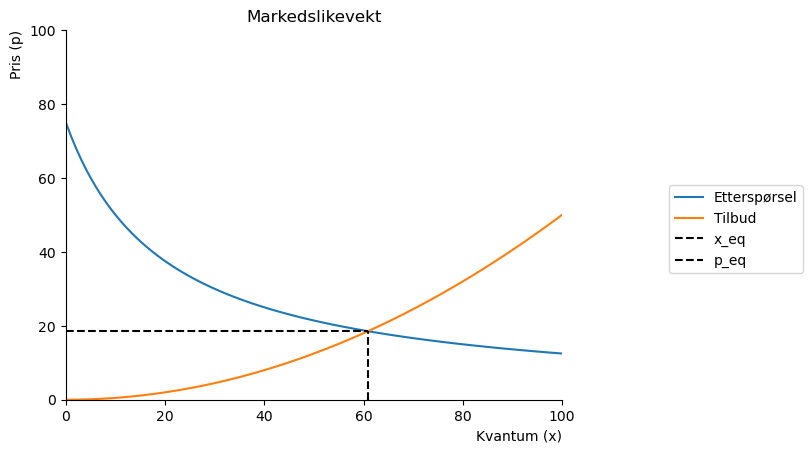

In [23]:
q = np.linspace(0,x_eq,100)

ax.vlines(x_eq,0,demand(x_eq), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq,0,x_eq, color='black',ls='dashed', label='p_eq')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Den vertikale avstanden mellom etterspørselskurven og likevektsprisen er forskjellen i hva konsumenter er villig til å betale for hver ekstra enhet og hva de faktisk må betale. Dette er et overskudd til konsumenten, og kan summeres over alle enheter kjøpt. Dette gir oss **konsumentoverskuddet** som det grønne området nedenfor.      

Den vertikale avstanden mellom likevektsprisen og tilbudskurven viser et overskudd for produsentene ettersom tilbudskurven angir deres grensekostnad. Det røde området i figuren nedenfor angir **produsentoverskuddet**. Både KO og PO er målt i pengeenheter, og summen utgjør samfunnsøkonomisk overskudd (SO = KO+PO).

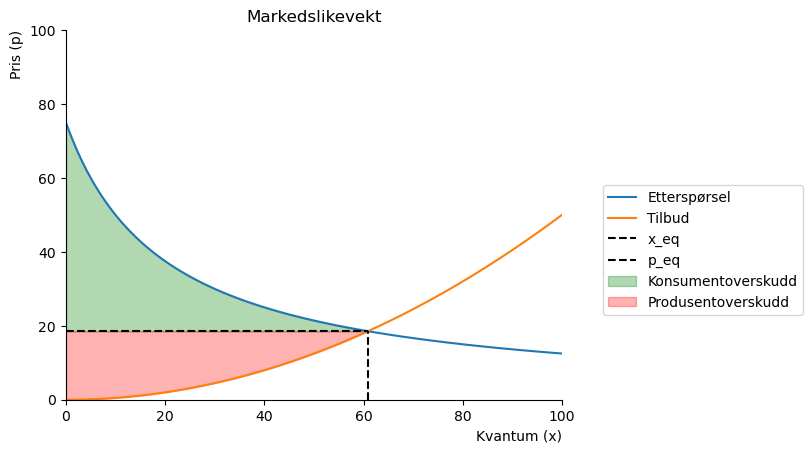

In [24]:

ax.fill_between(q,p_eq,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q),p_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')

ax.legend(bbox_to_anchor=(1.5,0.6))
fig

Markedslikevekten gir størst mulig samfunnsøkonomisk overskudd (se forelesning for bevis).

Vi kan beregne KO og PO ved hjelp av *integrasjon*.

In [25]:
producer_surplus=sp.integrate(p_eq-supply(x),(x,0,x_eq))
producer_surplus

752.771582940749

In [26]:
consumer_surplus=sp.integrate(demand(x)-p_eq,(x,0,x_eq))
consumer_surplus

967.006531985176

In [27]:
welfare_surplus=float(sp.integrate(demand(x)-supply(x),(x,0,x_eq)))
welfare_surplus

1719.7781149259245

Vi oppsummerer i en tabell:

In [31]:
from IPython.display import Markdown

tbl=f"""
|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------:|
| Solgt mengde:      | ${np.round(float(x_eq),2)}$           |
| Pris:               | ${np.round(float(p_eq),2)}$              |
| Konsumentoverskudd: | ${np.round(float(consumer_surplus),2)}$ | 
| Produsentoverskudd: | ${np.round(float(producer_surplus),2)}$ | 
| Samfunnsøkonomisk overskudd:    | ${np.round(float(welfare_surplus),2)}$   | 
"""
display(Markdown(tbl))


|                     | Verdi (kr)                                    |
| :-------------------| :----------------------------------------:|
| Solgt mengde:      | $60.9$           |
| Pris:               | $18.54$              |
| Konsumentoverskudd: | $967.01$ | 
| Produsentoverskudd: | $752.77$ | 
| Samfunnsøkonomisk overskudd:    | $1719.78$   | 
